<a href="https://colab.research.google.com/github/chenglifang/chenglifang.github.io/blob/master/Conclusion_of_QSAR_tutorial_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **准备工具**

In [ ]:
!pip install rdkit
# install rekit相当于购买了rdkit
# 在python中想使用其他库的内容时，需要先安装这个库，然后从库中导入要用的模块，类，函数等等。
# 这里就是安装了rdkit这个库

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 16.6 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem, DataStructs
# 从库rdkit中导入模块Chem和模块DataStructs
from rdkit.Chem import AllChem, Descriptors
# 从库rdkit的模块Chem中导入模块AllChem和模块Sescriptors

In [ ]:
! pip install numpy
# 安装第三方库numpy
# NumPy（Numerical Python）是 Python 中用于科学计算和数值运算的核心库之一。
# 它提供了高效的数组操作、矩阵运算和大量的数学函数，是进行数据处理和数值计算时的基础工具。

In [ ]:
! pip install joblib
# 安装第三方库joblib

库joblib的功能

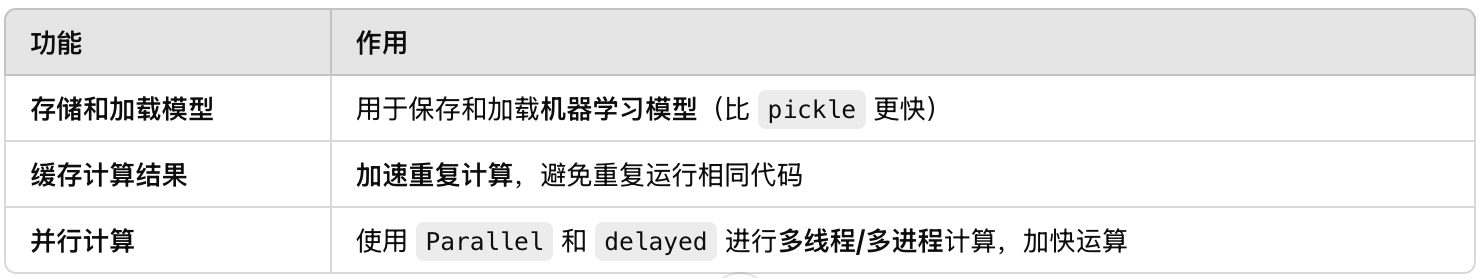

In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:
pip install scikit-learn==1.6.1

In [ ]:
import numpy as np
# 导入 NumPy 库，并将其简写为 np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, matthews_corrcoef
import joblib

# Reading molecules and activity from SDF
从 SDF 格式的文件中读取分子和活动
赋值sdf文件为fname，调用Chem.SDMolSupplier(fname)函数遍历sdf文件fname中的每个分子对象mol和其特征信息，并将各个分子对象mol及其对应的特征信息存储在一个名为mols的列表中。对每个分子对象mol调用GetIntProp("logBB_class")函数，从而抽取每个分子对象对应的特征信息之一，名为"logBB_class"的特征信息。并将每个分子对象对应的名为"logBB_class"的特征信息储存在名为y的列表中。

In [ ]:
from google.colab import files
uploaded = files.upload()
# 这段代码允许在colab上从本地上传文件，用于之后的文件读取。

fname = "logBB.sdf"
# 给变量fname 赋值为"logBB.sdf"，
# 或者说给数据"logBB.sdf"起名为fname，或把数据数据"logBB.sdf"放到名为fname的盒子中。

# 在处理化学数据时，通常会将分子对象及其对应的标签一一对应地存储在 mols 和 y 中
mols = []
# 创建一个空列表，并将其赋值给变量 mols，[] 用于定义列表，列表是一种可变的、有序的数据结构。
# 在化学信息学领域，特别是使用 RDKit 等工具时，mols 通常用于存储分子对象的列表。
# 例如，使用 RDKit 从文件中读取分子时，可以将每个分子对象添加到 mols 列表中，以便后续处理。

y = []
# 创建一个空列表，并将其赋值给变量y， y通常用于存储分子的生物活性值或其他相关属性.

for mol in Chem.SDMolSupplier(fname): # 遍历 SDF 文件中的每个分子。
# Chem.SDMolSupplier(fname) 是 RDKit 库中的一个函数，
# 用于从指定的 SDF（Structure-Data File）文件中读取分子数据。从指定的 SDF 文件中加载分子。
# 该函数返回一个迭代器，允许逐个访问文件中的每个分子。
    if mol is not None: # 用于判断变量 mol 是否不为 None，确保分子是有效的。
      # append 方法在此处的作用是将新的元素添加到各自的列表中，以便后续处理或分析
        mols.append(mol) # 将当前的分子对象 mol 添加到 mols 列表的末尾
        y.append(mol.GetIntProp("logBB_class")) # 获取当前分子 mol 的 logBB_class 属性
        # mol：是一个 RDKit Mol 对象，表示一个化学分子。
        # GetIntProp()：这是 Mol 对象的一个方法，用于从分子中获取一个 整数类型的属性。
        # "logBB_class"：这是你希望获取的属性的名称。属性名是字符串 "logBB_class"
        # GetIntProp("logBB_class") 语句会返回该分子对象 mol 中名为 "logBB_class" 的整数值。

Saving logBB.sdf to logBB.sdf


[17:08:21] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17 18 19 20 21
[17:08:21] ERROR: Could not sanitize molecule ending on line 3192
[17:08:21] ERROR: Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17 18 19 20 21
[17:08:21] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18
[17:08:21] ERROR: Could not sanitize molecule ending on line 4541
[17:08:21] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18
[17:08:21] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 15 16
[17:08:21] ERROR: Could not sanitize molecule ending on line 5314
[17:08:21] ERROR: Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 15 16
[17:08:21] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 14 15 16 17 18
[17:08:21] ERROR: Could not sanitize molecule ending on line 7252
[17:08:21] ERROR: Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 14 15 16 17 18
[17:08:21] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 11 12 13 14 15
[17:08:21] ERROR

调用Chem.SDMolSupplier(fname)函数遍历sdf文件fname中的每个分子对象mol和其特征信息。通过索引查看各个分子对象及其特征信息。

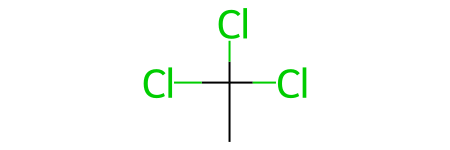

In [ ]:
supplier=Chem.SDMolSupplier(fname)
mol=supplier[0]
mol

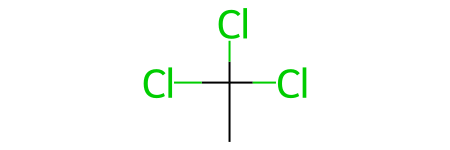

In [ ]:
mol=Chem.SDMolSupplier(fname)[0]
mol

查看包含各个分子对象及其对应特征信息的列表mols的长度，即查看列表mols中分子对象的数量。

In [ ]:
len(mols)

299

打印列表mols，

通过以下方法打印出 SMILES 格式:

In [ ]:
for mol in mols:
    smiles = Chem.MolToSmiles(mol)  # 将 Mol 对象转换为 SMILES 字符串
    print(smiles)

CC(Cl)(Cl)Cl
ClCC(Cl)Cl
FC(F)=CCl
CCCCO
CCC(C)=O
C=COC=C
CCOCC
CC(C)CO
COC(C)=O
ClCC(Cl)(Cl)Cl
CCCCCO
CCC(C)(C)C
CCCC(C)C
CCCC(C)=O
CCC(C)CC
CCC(C)(C)O
c1ccccc1
C1CCCCC1
CCOC(C)=O
CC1CCCC1
CN1CCN2c3ccccc3Cc3ccccc3C2C1
Cc1ncc2n1-c1ccc(Cl)cc1C(c1ccccc1F)=NC2
COn1cc(C(=O)O)c(=O)c2cc3c(cc21)OCO3
CN1CCN2c3ncccc3Cc3ccccc3C2C1
CN1CCC23c4c5ccc(O)c4OC2C(O)C=CC3C1C5
Cc1cccc(C)c1
[H]/N=C(\N)Nc1nc(-c2ccccc2)cs1
CN(C)CCc1ccccn1
CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21
Cc1c(O)cccc1C(=O)NC(CSc1ccccc1)C(O)CN1CC2CCCCC2CC1C(=O)NC(C)(C)C
Cc1ccnc2c1NC(=O)c1cccnc1N2C1CC1
CCCCCC
CN1CCCC1c1cccnc1
CN1CN(c2ccccc2)C2(CCN(CCCC(=O)c3ccc(F)cc3)CC2)C1=O
CCCCCCCCC
CNCCCN1c2ccccc2Sc2ccc(Cl)cc21
O=C1CC(=O)N(c2ccccc2)c2cc(Cl)ccc2N1
O=C1CN=C(c2ccccc2)c2cc(Cl)ccc2N1
c1cncc(C2CCCN2)c1
CSc1ccc2c(c1)N(CCC1CCCNC1)c1ccccc1S2
COc1ccc(CCNCCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C)cc1OC
CCC1(C)C(=O)NC(=O)NC1=O
CCCCCCCC
Cc1cc2c(s1)Nc1ccccc1N=C2N1CCN(C)CC1
Clc1ccc2c(c1)C1CNCC1c1ccccc1O2
CN1CC2c3ccccc3Oc3ccc(Cl)cc3C2C1
CCCCCCC1(CC)C(=O)NC(=O)NC1=O
O=

想查看分子的可视化（例如绘制分子结构图），可以使用 RDKit 的 Draw.MolToImage() 来生成图像：

In [ ]:
from rdkit.Chem import Draw
for mol in mols:
    img = Draw.MolToImage(mol)
    img.show()

直接打印列表mols，出现的是分子对象储存的位置

In [ ]:
mols

通过索引查看列表y中各个分子对象对应的名为"logBB_class"的特征信息的值：

In [ ]:
y[1]

0

In [ ]:
y

[1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,


In [ ]:
for mol in Chem.SDMolSupplier(fname):
  if mol is not None:
    logBB_class=mol.GetIntProp("logBB_class")
    logBB_class

[17:08:57] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17 18 19 20 21
[17:08:57] ERROR: Could not sanitize molecule ending on line 3192
[17:08:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17 18 19 20 21
[17:08:57] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18
[17:08:57] ERROR: Could not sanitize molecule ending on line 4541
[17:08:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18
[17:08:57] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 15 16
[17:08:57] ERROR: Could not sanitize molecule ending on line 5314
[17:08:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 15 16
[17:08:57] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 14 15 16 17 18
[17:08:57] ERROR: Could not sanitize molecule ending on line 7252
[17:08:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 14 15 16 17 18
[17:08:57] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 11 12 13 14 15
[17:08:57] ERROR

In [ ]:
logBB_class=mol.GetIntProp("logBB_class")
logBB_class

0

# **Calculate descriptors (fingerprints) and convert them into numpy array**
计算描述符（指纹）并将其转换为 numpy 数组

遍历列表mols中的各个分子对象m，并且通过调用GetMorganFingerprintAsBitVect()函数计算各个分子对象m对应的Morgan Fingerprint。并将结果储存到列表fp里。

In [ ]:
# generate binary Morgan fingerprint with radius 2
fp = [AllChem.GetMorganFingerprintAsBitVect(m, 2) for m in mols]
# for m in mols表示：
# 遍历列表mols中的每个元素即每一个分子，
# 表示对于 mols 中的每个分子 m，都会计算其 Morgan Fingerprint 并将结果存储在列表 fp 中。

# AllChem.GetMorganFingerprintAsBitVect(m, 2)表示：
# 调用函数GetMorganFingerprintAsBitVect()来生成分子的 Morgan Fingerprint（摩根指纹），
# 该指纹是一个位向量（bit vector），常用于分子相似性计算。
# 2 表示 radius 2，即分子的 2阶邻域。
# 也就是说，它不仅考虑一个原子的直接邻居（1阶邻域），还考虑到这些邻居的邻居（2阶邻域）。使用更大的半径会捕捉到更大的分子子结构。

[17:08:57] DEPRECATION WARNING: please use MorganGenerator
[17:08:57] DEPRECATION WARNING: please use MorganGenerator
[17:08:57] DEPRECATION WARNING: please use MorganGenerator
[17:08:57] DEPRECATION WARNING: please use MorganGenerator
[17:08:57] DEPRECATION WARNING: please use MorganGenerator
[17:08:57] DEPRECATION WARNING: please use MorganGenerator
[17:08:57] DEPRECATION WARNING: please use MorganGenerator
[17:08:57] DEPRECATION WARNING: please use MorganGenerator
[17:08:57] DEPRECATION WARNING: please use MorganGenerator
[17:08:57] DEPRECATION WARNING: please use MorganGenerator
[17:08:57] DEPRECATION WARNING: please use MorganGenerator
[17:08:57] DEPRECATION WARNING: please use MorganGenerator
[17:08:57] DEPRECATION WARNING: please use MorganGenerator
[17:08:57] DEPRECATION WARNING: please use MorganGenerator
[17:08:57] DEPRECATION WARNING: please use MorganGenerator
[17:08:57] DEPRECATION WARNING: please use MorganGenerator
[17:08:57] DEPRECATION WARNING: please use MorganGenerat

用for循环遍历列表fp中的元素，并且打印每个元素的索引，及列表fp的长度。

In [ ]:
for i, f in enumerate(fp):
    print(f"Fingerprint {i} length: {f.GetNumBits()}")

Fingerprint 0 length: 2048
Fingerprint 1 length: 2048
Fingerprint 2 length: 2048
Fingerprint 3 length: 2048
Fingerprint 4 length: 2048
Fingerprint 5 length: 2048
Fingerprint 6 length: 2048
Fingerprint 7 length: 2048
Fingerprint 8 length: 2048
Fingerprint 9 length: 2048
Fingerprint 10 length: 2048
Fingerprint 11 length: 2048
Fingerprint 12 length: 2048
Fingerprint 13 length: 2048
Fingerprint 14 length: 2048
Fingerprint 15 length: 2048
Fingerprint 16 length: 2048
Fingerprint 17 length: 2048
Fingerprint 18 length: 2048
Fingerprint 19 length: 2048
Fingerprint 20 length: 2048
Fingerprint 21 length: 2048
Fingerprint 22 length: 2048
Fingerprint 23 length: 2048
Fingerprint 24 length: 2048
Fingerprint 25 length: 2048
Fingerprint 26 length: 2048
Fingerprint 27 length: 2048
Fingerprint 28 length: 2048
Fingerprint 29 length: 2048
Fingerprint 30 length: 2048
Fingerprint 31 length: 2048
Fingerprint 32 length: 2048
Fingerprint 33 length: 2048
Fingerprint 34 length: 2048
Fingerprint 35 length: 2048
Fi

In [ ]:
def rdkit_numpy_convert(fp): # 使用 def 关键字定义函数rdkit_numpy_convert(fp)，fp 是函数的参数
    output = []
    for f in fp:
        arr = np.zeros((1,)) # 使用 NumPy 的 zeros 函数创建一个长度为 1 的数组 arr，并将其初始化为 0
        # np.zeros() 是 NumPy 提供的一个函数，用于创建一个数组，并将所有元素初始化为零。
        DataStructs.ConvertToNumpyArray(f, arr)
        # 使用 RDKit 的 DataStructs.ConvertToNumpyArray 函数，将每一个分子指纹 f 转换为一个名为arr的 NumPy 数组，有多少个f就有多少个arr。
        output.append(arr) # # 将转换后的所有的数组 arr 添加到 output 列表。
    return np.asarray(output) # # 将 output 列表转换为 NumPy 数组并返回，
    # asarray 是 NumPy 提供的一个函数，用于将输入数据转换为 NumPy 数组（ndarray）

In [ ]:
x = rdkit_numpy_convert(fp)
# 调用 自定义的函数rdkit_numpy_convert 函数，按照函数中的步骤将 fp 转换为 NumPy 数组，赋值给 x

[0. 0. 0. ... 0. 0. 0.]
[0. 1. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 1. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 1. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 1. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 1. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 1. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 1. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0.

In [ ]:
x.shape # 获取 NumPy 数组 x 的形状信息

(299, 2048)

shape 是 NumPy 数组的一个属性，用于获取数组的维度信息。

x.shape 返回一个元组，表示数组在每个维度上的大小。例如，对于二维数组，shape 返回 (行数, 列数)。

In [ ]:
# check wether the data set is balanced
sum(y) / len(y)

0.5886287625418061

这行代码的作用是计算标签数组 y 中正类样本所占的比例，即正类样本的比例（也称为正类样本的频率）。在二分类问题中，通常用 1 表示正类，0 表示负类。

sum(y)：计算数组 y 中所有元素的总和。由于数组 y 中的元素通常为 0 或 1，（通常用 1 表示正类，0 表示负类）因此 sum(y) 等于正类样本的数量。

len(y)：获取数组 y 的长度，即样本的总数。

sum(y) / len(y)：计算正类样本的比例，即正类样本数量除以样本总数。
计算数据集的正类比例有助于了解数据的分布情况，特别是在处理类别不平衡的数据时。如果正类比例过低（例如低于 0.1），可能需要采取措施来处理类别不平衡，以提高模型的性能和可靠性。

# Set random seed to make all further calculations reproducible

In [ ]:
seed = 42 # ？？？？？？

# Split the whole set on training and test sets
将全集分成训练集和测试集

In [ ]:
# randomly select 20% of compounds as test set
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.20, random_state=seed)

在 Python 中，常用 scikit-learn 的 train_test_split() 函数来完成数据集划分。
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X：特征数据（如分子指纹、SMILES 表示等）。
y：目标变量（如 logBB_class）。
test_size=0.2：表示20% 的数据用于测试集，80% 的数据用于训练集。你可以根据需求调整这个比例，比如 test_size=0.3 表示 30% 数据用于测试。
random_state=42：用于保证数据划分的一致性（设置一个固定的随机种子，确保每次运行时数据集划分相同）。

# Create folds for cross-validation
创建用于交叉验证的折叠

In [ ]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) # cross-validation交叉验证

In [ ]:
# print out ids of folds
for i, (train_index, test_index) in enumerate(cv.split(x_tr, y_tr)):
    print("\nFold_" + str(i+1))
    print("TRAIN:", train_index)
    print("TEST:", test_index)


Fold_1
TRAIN: [  0   1   2   4   5   6   8   9  10  11  12  16  19  20  23  24  25  26
  27  30  31  32  33  34  36  38  39  40  41  42  44  45  47  48  49  50
  51  52  53  55  56  58  59  60  61  62  64  65  66  67  68  69  70  72
  75  76  77  78  79  80  83  84  85  86  87  88  89  91  92  93  94  95
  96  97  99 100 102 103 104 105 106 107 108 109 110 111 113 114 115 116
 117 118 119 121 122 123 126 127 128 129 130 132 133 134 137 138 139 140
 141 142 143 144 145 146 147 149 150 151 152 153 154 155 156 157 158 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 175 176 179 180 182
 183 184 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 208 209 210 212 213 214 215 216 218 219 220 221 222 223
 226 227 228 229 230 233 234 235 236 237 238]
TEST: [  3   7  13  14  15  17  18  21  22  28  29  35  37  43  46  54  57  63
  71  73  74  81  82  90  98 101 112 120 124 125 131 135 136 148 159 174
 177 178 181 185 186 207 211 217 224 225 231 232]

Fold_2

# **Scale X**

This step may be crucial for certain modeling approaches lke SVM. In the case of binary fingerprints it may be less useful.

StandardScaler是一个类，StandardScaler()是一个实例。StandardScaler().fit(x_tr)是调用实例StandardScaler()的方法fit()。
scale也是一个类，scale.transform(x_tr)是调用类方法transform()。

In [ ]:
# obtain scale object which can be further applied to scale any data to fit the training set
scale = StandardScaler().fit(x_tr) # 获取一个可以用于将任何数据缩放到与训练集相同分布的 StandardScaler 对象
# StandardScaler()：创建一个StandardScaler对象。
# .fit(x_tr)：计算训练数据 x_tr 的均值和标准差，并将这些统计信息存储在 StandardScaler 对象中。
x_tr = scale.transform(x_tr) # 使用计算得到的均值和标准差对训练数据进行转换
# .transform(x_tr)：使用先前计算的均值和标准差，将训练数据 x_tr 转换为标准正态分布，即每个特征的均值为 0，标准差为 1。
print(type(scale))
print(type(StandardScaler))

<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'type'>


In [ ]:
# it is a good idea to save it for future use
import joblib
joblib.dump(scale, "logBB_scale.pkl", compress=3)

['logBB_scale.pkl']

joblib.dump(obj, filename, compress=3)
obj：要保存的对象（这里是 scale，即 StandardScaler 预处理器）。
filename：存储对象的文件名（logBB_scale.pkl）。
compress=3：启用数据压缩（取值 0-9，数值越大，压缩率越高，但保存速度越慢）
为什么要保存scale？
模型部署时可以加载同样的 scale，确保测试数据用相同的标准化方法转换。
✅ joblib.dump() 保存对象，方便未来使用
✅ joblib.load() 读取对象，保持数据一致性
✅ 用于机器学习预处理，避免训练 & 测试数据分布不匹配
训练 & 测试数据分布不匹配：数值范围差距太大，模型可能无法正确预测

# Search for optimal tuning parameters and build the model
使用网格搜索字典进行超参数优化
超参数优化是指寻找最优的超参数组合，以使模型在验证集或测试集上表现最佳。

In [ ]:
# create grid search dictionary
param_grid = {"max_features": [x_tr.shape[1] // 10, x_tr.shape[1] // 7, x_tr.shape[1] // 5, x_tr.shape[1] // 3],
              "n_estimators": [100, 250, 500]}
# 定义超参数搜索空间

shape[0] 代表行数（样本数）
shape[1] 代表列数（特征数）
print(x_tr.shape)     # 输出: (5, 3) → 5 行 3 列
print(x_tr.shape[0])  # 输出: 5  → 样本数（行数）
print(x_tr.shape[1])  # 输出: 3  → 特征数（列数）

n_estimators 表示随机森林中使用的决策树（Decision Trees）数量。

In [ ]:
# setup model building  创建 GridSearchCV 进行超参数搜索
m = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=2, cv=cv, verbose=1)
#这行代码使用 网格搜索（Grid Search） 在 RandomForestClassifier 上进行 超参数优化，并行搜索最佳参数组合。

In [ ]:
# run model building # 训练网格搜索
m.fit(x_tr, y_tr)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_features': [204, 292, 409, 682],
                         'n_estimators': [100, 250, 500]},
             verbose=1)

In [ ]:
m.best_params_

{'max_features': 204, 'n_estimators': 100}

In [ ]:
m.best_score_

np.float64(0.7740248226950355)

In [ ]:
m.cv_results_

{'mean_fit_time': array([0.59269657, 1.20518718, 2.6003881 , 0.86648273, 1.37236934,
        2.9884798 , 0.95461826, 1.52114511, 3.44726658, 0.88226533,
        1.8624876 , 4.08997135]),
 'std_fit_time': array([0.13783983, 0.01485691, 0.35694464, 0.13166828, 0.051022  ,
        0.38427128, 0.12373587, 0.0341065 , 0.52530793, 0.23324164,
        0.04045004, 0.82973107]),
 'mean_score_time': array([0.01555448, 0.03835902, 0.07563591, 0.02394323, 0.04069929,
        0.07118459, 0.01848903, 0.03299804, 0.07789984, 0.01671815,
        0.03190212, 0.06167006]),
 'std_score_time': array([0.00166142, 0.00999359, 0.0202969 , 0.00863266, 0.01154414,
        0.01334888, 0.00538665, 0.0007339 , 0.01880255, 0.00549902,
        0.00035649, 0.0131505 ]),
 'param_max_features': masked_array(data=[204, 204, 204, 292, 292, 292, 409, 409, 409, 682, 682,
                    682],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
  

In [ ]:
m.cv_results_['mean_test_score']

array([0.77402482, 0.76161348, 0.76578014, 0.76569149, 0.77402482,
       0.76985816, 0.76170213, 0.76985816, 0.76569149, 0.76170213,
       0.76569149, 0.77402482])

In [ ]:
m.cv_results_['params']

[{'max_features': 204, 'n_estimators': 100},
 {'max_features': 204, 'n_estimators': 250},
 {'max_features': 204, 'n_estimators': 500},
 {'max_features': 292, 'n_estimators': 100},
 {'max_features': 292, 'n_estimators': 250},
 {'max_features': 292, 'n_estimators': 500},
 {'max_features': 409, 'n_estimators': 100},
 {'max_features': 409, 'n_estimators': 250},
 {'max_features': 409, 'n_estimators': 500},
 {'max_features': 682, 'n_estimators': 100},
 {'max_features': 682, 'n_estimators': 250},
 {'max_features': 682, 'n_estimators': 500}]

# Save model

In [ ]:
joblib.dump(m, "logBB_rf_morgan.pkl", compress=3)
# joblib.dump()：用于将对象（如训练好的模型）保存到文件中，以便以后加载并使用，而不必重新训练模型。
# m：要保存的对象，通常是一个训练好的机器学习模型（例如 RandomForestRegressor() 或 GridSearchCV）
# "logBB_rf_morgan.pkl"：保存的文件路径，文件格式是 .pkl（Pickle 格式），表示 Python 序列化对象。
# compress=3：可选参数，表示压缩级别，值从 0（无压缩）到 9（最大压缩）。3 代表适度压缩，可以减少文件大小，提高存储效率。

['logBB_rf_morgan.pkl']

# Predict test set compounds

In [ ]:
# load scale if necessary # 加载保存的模型
scale = joblib.load("logBB_scale.pkl")

In [ ]:
# scale descriptors of the test set compounds
x_ts = scale.transform(x_ts)

In [ ]:
# predict logBB class
pred_rf = m.predict(x_ts)

In [ ]:
pred_rf

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# calc statistics for test set preditions
# 计算不同评估指标

In [ ]:
accuracy_score(y_ts, pred_rf)
# 计算分类准确率（Accuracy）

0.7666666666666667

In [ ]:
y_ts

[1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1]

In [ ]:
matthews_corrcoef(y_ts, pred_rf)
# 计算 Matthews 相关系数（MCC）

np.float64(0.5083042452524145)

In [ ]:
cohen_kappa_score(y_ts, pred_rf)
# 计算 Cohen's Kappa 评分

np.float64(0.5070422535211268)

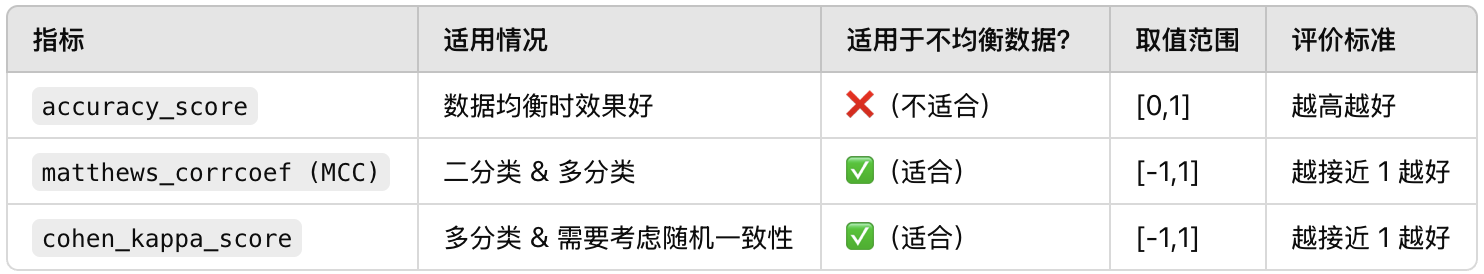

# applicability domain estimates

In [ ]:
# if the model includes several ones like RF models or consensus models (or for probabilistic models)
# we can calculate consistency of predictions amongs those models and use it for estimation of applicability domain
pred_prob = m.predict_proba(x_ts)
# predict_proba 是scikit-learn 分类模型的一个方法，它返回输入样本 x_ts 属于每个类别的概率。
# x_ts 是测试数据

In [ ]:
# probablity
pred_prob

array([[0.62, 0.38],
       [0.7 , 0.3 ],
       [0.56, 0.44],
       [0.13, 0.87],
       [0.04, 0.96],
       [0.86, 0.14],
       [0.3 , 0.7 ],
       [0.4 , 0.6 ],
       [0.18, 0.82],
       [0.76, 0.24],
       [0.51, 0.49],
       [0.54, 0.46],
       [0.71, 0.29],
       [0.59, 0.41],
       [0.15, 0.85],
       [0.11, 0.89],
       [0.14, 0.86],
       [0.85, 0.15],
       [0.45, 0.55],
       [0.55, 0.45],
       [0.14, 0.86],
       [0.53, 0.47],
       [0.79, 0.21],
       [0.06, 0.94],
       [0.  , 1.  ],
       [0.24, 0.76],
       [0.45, 0.55],
       [0.54, 0.46],
       [0.41, 0.59],
       [0.65, 0.35],
       [0.  , 1.  ],
       [0.33, 0.67],
       [0.76, 0.24],
       [0.4 , 0.6 ],
       [0.08, 0.92],
       [0.3 , 0.7 ],
       [0.01, 0.99],
       [0.36, 0.64],
       [0.01, 0.99],
       [0.84, 0.16],
       [0.06, 0.94],
       [0.94, 0.06],
       [0.18, 0.82],
       [0.06, 0.94],
       [0.13, 0.87],
       [0.1 , 0.9 ],
       [0.63, 0.37],
       [0.69,

In [ ]:
# setup threshold
threshold = 0.8
# 在分类问题中，setup threshold 主要用于确定预测结果的决策边界。
# 例如，在二分类问题中，predict_proba 方法返回的是某个类别的概率，我们可以设置一个**阈值（threshold）**来决定最终分类结果。

In [ ]:
# calc maximum predicted probability for each row (compound) and compare to the threshold
da = np.amax(pred_prob, axis=1) > threshold

In [ ]:
da

array([False, False, False,  True,  True,  True, False, False,  True,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False,  True, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
       False, False, False,  True, False,  True])

In [ ]:
# calc statistics
accuracy_score(np.asarray(y_ts)[da], pred_rf[da])
# accuracy_score 是 scikit-learn 库中的函数，计算分类任务的准确率（Accuracy）

0.9310344827586207

np.asarray(y_ts)[da]：
da 是一个布尔数组，表示每个样本是否满足最大概率大于阈值的条件。使用 da 来筛选 y_ts，即只有 da 为 True 的样本（即最大预测概率超过阈值的样本）会被保留下来。筛选后的结果是这些样本的真实标签。

pred_rf[da]：
da 同样是一个布尔数组，表示哪些样本满足最大概率超过阈值的条件。通过 pred_rf[da] 来筛选出这些样本的预测结果。

In [ ]:
np.asarray(y_ts)[da]

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1])

In [ ]:
pred_rf[da]

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1])

In [ ]:
pred_rf

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
matthews_corrcoef(np.asarray(y_ts)[da], pred_rf[da])

np.float64(0.8116883116883117)

In [ ]:
cohen_kappa_score(np.asarray(y_ts)[da], pred_rf[da])

np.float64(0.8116883116883117)

In [ ]:
# calc coverage
sum(da) / len(da)

np.float64(0.48333333333333334)

# Add to Morgan fingerprints some other descriptors and look at the model performance
在摩根指纹中添加其他描述符，查看模型性能

各个分子对象mol及其对应的特征信息存储在一个名为mols的列表中。用append()函数，追加一些描述符到列表descr中。

In [ ]:
# calc some descriptors
descr = []
for m in mols:
    descr.append([Descriptors.MolLogP(m),
                  Descriptors.TPSA(m),
                  Descriptors.NHOHCount(m),
                  Descriptors.NOCount(m),
                  Descriptors.NumHAcceptors(m),
                  Descriptors.NumHDonors(m),
                  Descriptors.NumRotatableBonds(m),
                  Descriptors.NumHeteroatoms(m),
                  Descriptors.FractionCSP3(m)])
descr = np.asarray(descr)

In [ ]:
descr.shape

(299, 9)

In [ ]:
# add them to morgan fingerprints
x = np.concatenate((x, descr), axis=1)

In [ ]:
x.shape

(299, 2057)

In [ ]:
# randomly select 20% of compounds as test set
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.20, random_state=seed)

In [ ]:
scale = StandardScaler().fit(x_tr)
x_tr = scale.transform(x_tr)

In [ ]:
# create grid search dictionary
param_grid = {"max_features": [x_tr.shape[1] // 10, x_tr.shape[1] // 7, x_tr.shape[1] // 5, x_tr.shape[1] // 3],
              "n_estimators": [100, 250, 500]}

In [ ]:
# setup model building
m = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=2, cv=cv, verbose=1)

In [ ]:
# run model building
m.fit(x_tr, y_tr)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_features': [205, 293, 411, 685],
                         'n_estimators': [100, 250, 500]},
             verbose=1)

In [ ]:
m.best_score_

np.float64(0.8115248226950355)

In [ ]:
# scale descriptors of the test set compounds
x_ts = scale.transform(x_ts)

In [ ]:
# predict logBB for the test set compounds
pred = m.predict(x_ts)

In [ ]:
pred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1])

In [ ]:
# calc statistics
print("Accuracy = ", accuracy_score(y_ts, pred))
print("MCC = ", matthews_corrcoef(y_ts, pred))
print("Kappa = ", cohen_kappa_score(y_ts, pred))

Accuracy =  0.8166666666666667
MCC =  0.6196817475252878
Kappa =  0.6162790697674418


In [ ]:
# estimate applicability domain and calc stat
pred_prob = m.predict_proba(x_ts)

In [ ]:
da = np.amax(pred_prob, axis=1) > threshold

In [ ]:
print("Accuracy = ", accuracy_score(np.asarray(y_ts)[da], pred[da]))
print("MCC = ", matthews_corrcoef(np.asarray(y_ts)[da], pred[da]))
print("Kappa = ", cohen_kappa_score(np.asarray(y_ts)[da], pred[da]))
print("Coverage = ", sum(da) / len(da))

Accuracy =  0.8787878787878788
MCC =  0.7352060597618595
Kappa =  0.7283950617283951
Coverage =  0.55


# Let's try to analyse which variables are the most important in the model

让我们试着分析一下模型中哪些变量最重要

In [ ]:
# rebuild RF model manually using best parameters to be able to extract additional information from the model
rf = RandomForestClassifier(n_estimators=m.best_params_["n_estimators"],
                           max_features=m.best_params_["max_features"],
                           random_state=seed)
rf.fit(x_tr, y_tr)

RandomForestClassifier(max_features=411, random_state=42)

In [ ]:
imp = rf.feature_importances_

In [ ]:
imp

array([0.        , 0.00205907, 0.00066208, ..., 0.00881807, 0.02295112,
       0.02100479])

In [ ]:
indices = np.argsort(imp)[::-1]
# np.argsort() 是 NumPy 提供的一个排序函数，它返回的是从小到大排序的索引，而不是排序后的值。
# 这部分是 Python 的切片操作，用于反转数组的顺序。
# 由于 np.argsort(imp) 生成的是从小到大的索引，我们通过 [::-1] 让它变成从大到小的索引。


print("Feature ranking:")

# print top 10 features
for i in range(10):
    print("%d. feature %d (%f)" % (i + 1, indices[i], imp[indices[i]]))

Feature ranking:
1. feature 2049 (0.135968)
2. feature 2048 (0.080837)
3. feature 2051 (0.055963)
4. feature 650 (0.029810)
5. feature 2052 (0.027243)
6. feature 807 (0.025788)
7. feature 2055 (0.022951)
8. feature 2056 (0.021005)
9. feature 2050 (0.012677)
10. feature 794 (0.011637)
